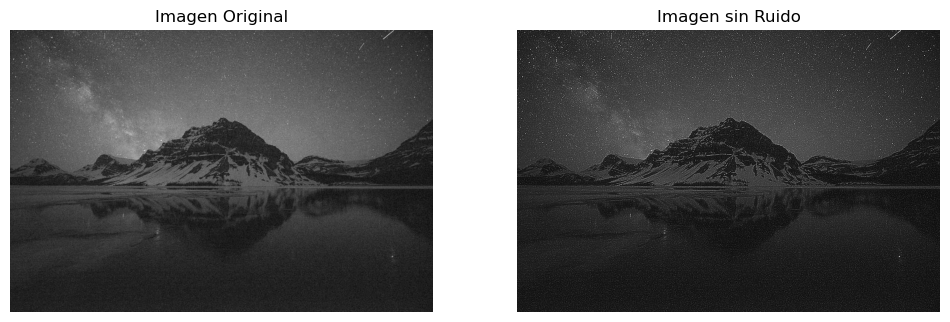

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen original en escala de grises
imagen = cv2.imread('via lactea.jpg', cv2.IMREAD_GRAYSCALE)


# Aplicar un suavizado con filtro Gaussiano
imagen_suavizada = cv2.GaussianBlur(imagen, (9, 9), 10)
cv2.imwrite('imagen_suavizada.jpg', imagen_suavizada)

# Restar la imagen suavizada de la original
resta = cv2.subtract(imagen, imagen_suavizada)
cv2.imwrite('resta.jpg', resta)

# Realce de la imagen sumando la resta a la original
imagen_realzada = cv2.add(imagen, resta)
cv2.imwrite('realzada.jpg', imagen_realzada)

# Leer un conjunto de imágenes en escala de grises
imagenes = [
    cv2.imread('imagen_suavizada.jpg', cv2.IMREAD_GRAYSCALE),
    cv2.imread('resta.jpg', cv2.IMREAD_GRAYSCALE),
    cv2.imread('realzada.jpg', cv2.IMREAD_GRAYSCALE)
]

# Inicializar una imagen acumuladora con ceros del mismo tamaño que las imágenes
acumulador = np.zeros_like(imagenes[0], dtype=np.float32)

# Sumar las imágenes al acumulador
for img in imagenes:
    acumulador = cv2.add(acumulador, img.astype(np.float32))

# Calcular la imagen promedio dividiendo por el número de imágenes
imagen_promedio = acumulador / len(imagenes)

# Convertir la imagen promedio a 8 bits (escala de grises estándar)
imagen_promedio = cv2.convertScaleAbs(imagen_promedio)

# Crear un kernel de nitidez
kernel = np.array([[0, -1, 0],
                   [-1,  5, -1],
                   [0, -1, 0]])

# Aplicar el filtro
sharpened = cv2.filter2D(imagen_promedio, -1, kernel)

#cv2.imwrite('original.jpg', imagen)
#cv2.imwrite('nitido.jpg', sharpened)


# Mostrar la imagen original y la imagen denoised
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen sin Ruido')
plt.imshow(sharpened, cmap='gray')
plt.axis('off')

plt.show()

